<img src="./img/vs265header.svg"/>


<h1 align="center">Lab 3 - Unsupervised Learning </h1>
<h2 align="center"> Part 1 - Simple Datasets </h2>

In [1]:
%pylab inline

import matplotlib.animation as animation
import base64

import utils.anim as anim
import utils.lab3utils as util

Populating the interactive namespace from numpy and matplotlib


In [2]:
# WINDOWS USERS ONLY:
# the animations in this notebook generate small video files stored in the ./utils/ directory
# running this cell will clear those files for you.

# please run this cell right before turning in your problem set

#anim.clearFiles()

## 1. Hebbian Learning as Neural PCA

The file `data/data2d.npz` contains two arrays of data that will be used for this problem, $D_1$ and $D_2$, each of which contains 1000 data points in two dimensions. We load it in the cell below.

In [3]:
#first we load data2d.npz
d = np.load('./data/data2d.npz')
D1,D2 = d['D1'],d['D2']

### Unconstrained Hebbian Learning

Train a single linear neuron on this data using Hebbian learning (unconstrained). Plot the weight vector along with the data on each weight update.

The data-loading and results-plotting code has been provided for you. You just need to add the missing lines to the function `hebbLearn` below.

In [4]:
def hebbLearn(dataset,weights,learningRate):
    """
    Weight update with a Hebbian rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Hebbian-updated weight matrix 
                                 of linear transformation of input data
                                 
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForHebbLearn" list variable
    """
    
    output =  weights.transpose() @ dataset
    
    dw = dataset @ dataset.transpose() @ weights

    weights += learningRate * dw
    
    return weights

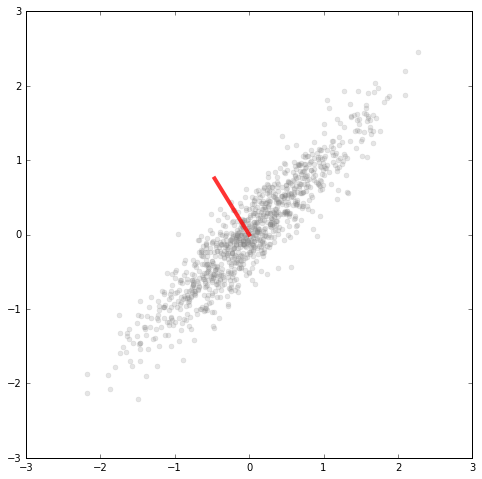

In [5]:
# first we set the hyperparameters
numTrials = 50
learningRate = 0.01

# now we initialize the run and view the data
figure,plottedWeightVector,weights,learningRate = util.initialize(D1)

In [6]:
#hebbLearn(D1,weights,learningRate)
hebbAnim

NameError: name 'hebbAnim' is not defined

In [8]:
argumentsForHebbLearn = [hebbLearn,D1,plottedWeightVector,weights,learningRate]
    
hebbAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForHebbLearn,
                                    frames=numTrials, 
                                    )

anim.display_animation(hebbAnim,fps=75)

Describe your results. What happens when you apply Hebbian learning to this dataset?

##### YOUR ANSWER HERE

### Oja's Rule

Now apply Oja’s single-neuron learning rule to constrain the growth of
the weight vector, and again show how the weight vector evolves during
learning. As before, you only need to add a few lines to the `ojaLearn` function below.

In [19]:
def ojaLearn(dataset,weights,learningRate):
    """
    Weight update with the Oja rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Oja-updated weight matrix 
                                 of linear transformation of input data
    
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForOjaLearn" list variable
    """
    
    output =  weights.transpose() @ dataset
    
    dw = output @ (dataset - weights @ output).transpose()

    weights += learningRate * dw.transpose()
    
    return weights

In [20]:
# first we set the hyperparameters
numTrials = 150
learningRate = 0.0005

# now we initialize the run
figure,plottedWeightVector,weights,learningRate = util.initialize(D1)

argumentsForOjaLearn = [ojaLearn,D1,plottedWeightVector,weights,learningRate]

ojaAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForOjaLearn,
                                    frames=numTrials, 
                                    )

anim.display_animation(ojaAnim,fps=75)

What is different about the weight vector learned by Oja's Rule?

In [18]:
debug

> <ipython-input-16-973217a36132>(25)ojaLearn()
     23     dw = output @ (dataset - weights @ output).transpose()
     24 
---> 25     weights += learningRate * dw
     26 
     27     return weights

ipdb> dw.shape
(1, 2)
ipdb> weights.shape
(2, 1)
ipdb> q


### Sanger's Rule 

Use Sanger’s rule to train two neurons to represent the principal components
of the data.  Make sure you run the algorithm for long enough (>1000 steps)!

In [23]:
def sangerLearn(dataset,weights,learningRate):
    """
    Weight update with the Sanger rule.
    weights and learningRate should be provided by output of util.initialize()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
                                 
    NOTE: if you add any additional parameters to this function, you need to
    also add them to the "argumentsForOjaLearn" list variable
    """
    
    output = weights.transpose() @ dataset
    numOutputs = output.shape[0]
    
#     residual = # YOUR CODE - what does the "residual" term start out as?
    # HINT: Sanger's rule for one neuron reduces to Oja's rule
    
    dw = np.zeros(weights.shape)
    ac = output @ output.transpose()
    for i in range(numOutputs):
        for j in range(1, numOutputs):
            ac[i, j] = 0
    dw = output @ dataset.transpose() - ac @ weights
    
#     for i in range(numOutputs):
        
#         residual = # YOUR CODE - update the residual for neuron i in terms of the last residual
        
#         dw[:,i] = # YOUR CODE - calculate dw for neuron i
        
    weights += dw*learningRate # update weight vector by dw
    
    return weights

In [24]:
# first we set the hyperparameters
numTrials = 1500
learningRate = 50

# now we initialize the run and view the data
figure,plottedWeightVectors,weights,learningRate = util.initialize(D1,numOutputs=2)

argumentsForSangerLearn = [sangerLearn,D1,plottedWeightVectors,weights,learningRate]

sangerAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForSangerLearn, 
                                    frames=numTrials, 
                                    )
anim.display_animation(sangerAnim,fps=75)

What is the angle between the two weight vectors?

##### YOUR ANSWER HERE

### Non-Gaussian Data

Now, run the cells below to load the dataset `D2` and learn weight vectors using the vanilla Hebb's rule, Oja's rule, and Sanger's rule (with two components) code that you wrote. 

What's different about the results from this dataset? Can you explain why there's a difference? 

Don't worry if your Sanger-trained network doesn't converge well, so long as it works on the first dataset.

##### YOUR ANSWER HERE

In [ ]:
numTrials = 250
learningRate = 0.1

figure,plottedWeightVector,weights,learningRate = util.initialize(D2)

argumentsForHebbLearn = [hebbLearn,D2,plottedWeightVector,weights,learningRate] 

hebbAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                     fargs=argumentsForHebbLearn,
                                    frames=numTrials, 
                                    )

anim.display_animation(hebbAnim,fps=75)

In [ ]:
numTrials = 250
learningRate = 0.05

figure,plottedWeightVector,weights,learningRate = util.initialize(D2)
argumentsForOjaLearn = [ojaLearn,D2,plottedWeightVector,weights,learningRate]

ojaAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs= argumentsForOjaLearn,
                                    frames=numTrials, 
                                    )
anim.display_animation(ojaAnim,fps=75)

In [ ]:
numTrials = 1000
learningRate = 1

figure,plottedWeightVectors,weights,learningRate = util.initialize(D2, numOutputs=2)
argumentsForSangerLearn = [sangerLearn,D2,plottedWeightVectors,weights,learningRate]

sangerAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=argumentsForSangerLearn,
                                    frames=numTrials, 
                                    )
anim.display_animation(sangerAnim,fps=75)

### Winner-Take-All Networks



Now, train a 4-unit Winner-Take-All network using the standard competitive learning rule as in equation 9.7 from Hertz, Krogh, and Palmer. *HINT:* look up the numpy function `argmax`.

Don't worry if it takes multiple runs to get your algorithm to converge to the correct solution. Unlike Hebbian learning and other PCA methods, WTA learning is finicky -- the results are highly dependent on the initialization, which is typically random. If you want to make sure that your algorithm is coded correctly, pass `goodWeights=True` to the function `initializeWTA` below, which gives a non-random initialization that will work if you've coded WTA correctly.

Once you've got the basic algorithm working, implement one (or more) of the strategies suggested on p222 of Hertz, Krogh, and Palmer.

In [ ]:
def WTALearn(dataset,weights,learningRate):
    """
    Weight update with the WTA rule.
    weights and learningRate should be provided by output of initializeWTA()
    
    Parameters
    ----------
    dataset      : dataset, numpy array, either D1 or D2
    weights      : numpy array, weight matrix of linear transformation of input data
    learningRate : float, factor to multiply weight updates
    
    Returns
    -------
    weights      : numpy array, Sanger-updated weight matrix 
                                 of linear transformation of input data
    """
    
    output = # YOUR CODE - compute neuron output for all data
    winnerIndices = # YOUR CODE - look up np.argmax
    
    numOutputs = output.shape[0]
    
    dw = np.zeros(weights.shape)
    
    for i in range(numOutputs):
        
        # YOUR CODE - might need multiple lines
        
        dw[:,i] = 
    
    weights += dw
    
    return weights

In [ ]:
numTrials = 500
learningRate = 0.5

# pass goodWeights=True to use a non-random initialization
# that will converge if your algorithm is correctly implemented

figure,plottedWeightVectors,weights,learningRate = util.initializeWTA(
                                                    D2,goodWeights=True,numOutputs=4,
                                                    learningRate=learningRate)

WTAAnim = animation.FuncAnimation(figure, util.animFrame, init_func=anim.init,interval=2,
                                    fargs=[WTALearn,D2,plottedWeightVectors,weights,learningRate], 
                                    frames=numTrials, 
                                    )

anim.display_animation(WTAAnim,fps=75)